<a href="https://colab.research.google.com/github/g-roger/deep-learning/blob/master/Exemplo_Autoencoder_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [4]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [6]:
input_img= Input(shape=(784,))
encoded = Dense(units=32, activation='relu')(input_img)
decoded = Dense(units=784, activation='sigmoid')(encoded)

In [7]:
autoencoder=Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [8]:
encoder = Model(input_img, encoded)
encoder.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [9]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 6s 7ms/step - loss: 0.2791 - accuracy: 0.0124 - val_loss: 0.1936 - val_accuracy: 0.0137
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1729 - accuracy: 0.0133 - val_loss: 0.1546 - val_accuracy: 0.0105
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1452 - accuracy: 0.0109 - val_loss: 0.1350 - val_accuracy: 0.0096
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1298 - accuracy: 0.0106 - val_loss: 0.1226 - val_accuracy: 0.0115
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1193 - accuracy: 0.0101 - val_loss: 0.1138 - val_accuracy: 0.0111
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1119 - accuracy: 0.0107 - val_loss: 0.1077 - val_accuracy: 0.0115
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1066 - accuracy: 0.0106 - val_loss: 0.1031 - val_accuracy: 0.0116
Epoch 

In [11]:
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

In [12]:
encoded_imgs.shape

(10000, 32)

In [13]:
predicted.shape

(10000, 784)

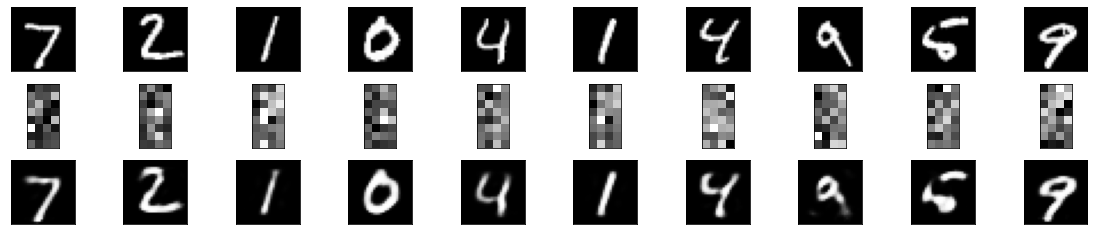

In [14]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    
plt.show()